In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Kerry\Tariff Calculations plus Population.csv', sep=';')
df.head()

,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0


In [2]:
df.isnull().sum()

Country                             0
US 2024 Deficit                     0
US 2024 Exports                     0
US 2024 Imports (Customs Basis)     0
Trump Tariffs Alleged               0
Trump Response                      0
Population                         32
dtype: int64

In [3]:
df = df.dropna(subset=['Population'])

In [4]:
df.duplicated().sum()

0

In [5]:
df.columns

Index(['Country', 'US 2024 Deficit', 'US 2024 Exports',
       'US 2024 Imports (Customs Basis)', 'Trump Tariffs Alleged',
       'Trump Response', 'Population'],
      dtype='object')

In [6]:
df.describe()

,Population
count,1.720000e+02
mean,4.286567e+07
std,1.602899e+08
min,9.816000e+03
25%,8.149932e+05
50%,6.833880e+06
75%,2.831881e+07
max,1.438070e+09


In [7]:
cols_to_convert = ['US 2024 Deficit', 'US 2024 Exports', 'US 2024 Imports (Customs Basis)']

for col in cols_to_convert:
    df[col] = df[col].replace(',', '', regex=True)  
    df[col] = pd.to_numeric(df[col], errors='coerce')  


In [8]:
df.describe()


,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Population
count,172.000000,172.000000,172.000000,1.720000e+02
mean,-6172.715116,11372.547674,17548.502907,4.286567e+07
std,34055.410554,48081.681606,76638.207319,1.602899e+08
min,-295401.600000,0.900000,0.100000,9.816000e+03
25%,-190.975000,66.900000,22.600000,8.149932e+05
50%,28.550000,359.550000,216.550000,6.833880e+06
75%,346.200000,2940.025000,3093.175000,2.831881e+07
max,21913.500000,370189.200000,605760.400000,1.438070e+09


### Data Visualizations 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

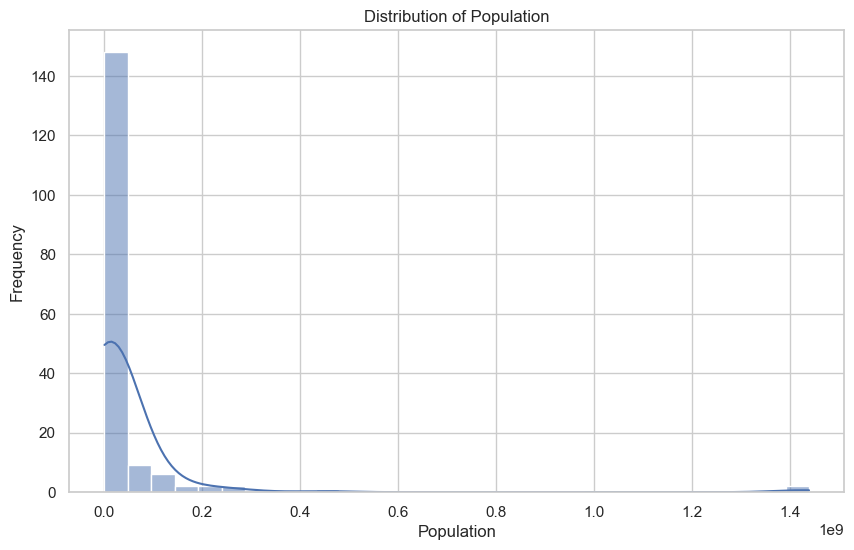

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Population'], bins=30, kde=True)
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

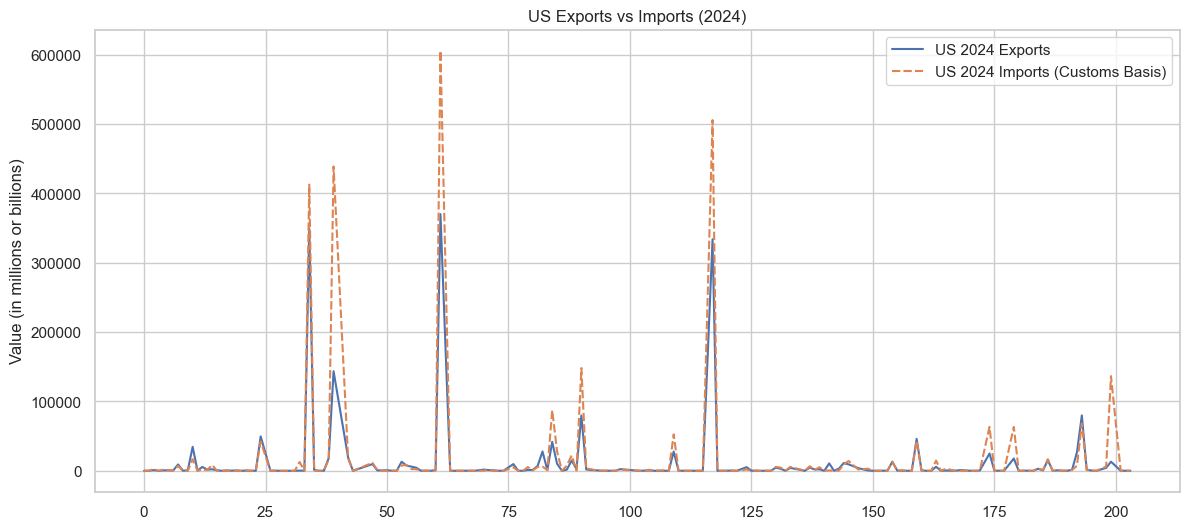

In [11]:
# Convert if not already done
df['US 2024 Exports'] = df['US 2024 Exports'].replace(',', '', regex=True).astype(float)
df['US 2024 Imports (Customs Basis)'] = df['US 2024 Imports (Customs Basis)'].replace(',', '', regex=True).astype(float)

plt.figure(figsize=(14, 6))
sns.lineplot(data=df[['US 2024 Exports', 'US 2024 Imports (Customs Basis)']])
plt.title('US Exports vs Imports (2024)')
plt.ylabel('Value (in millions or billions)')
plt.show()


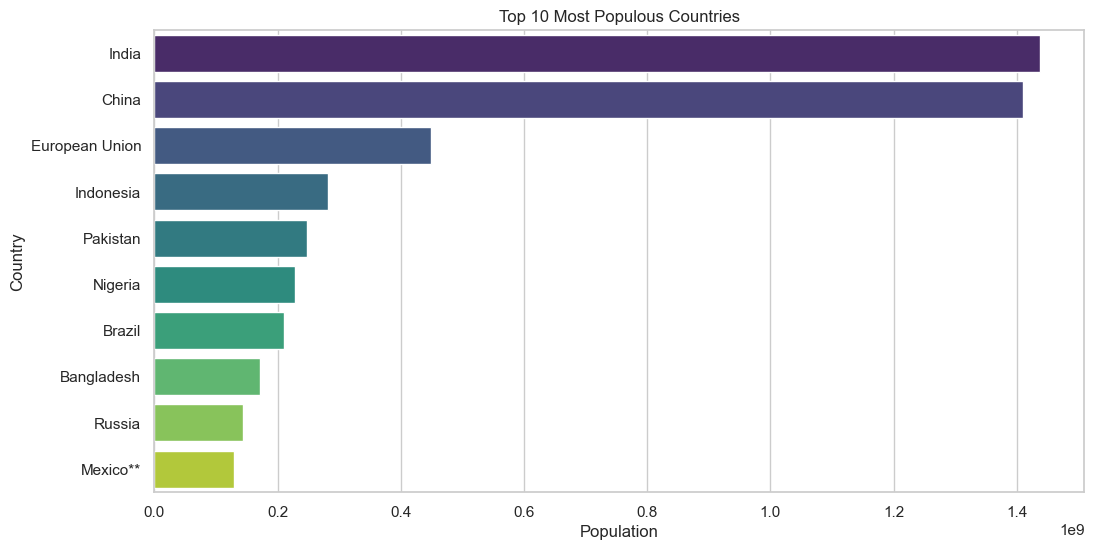

In [13]:
top10 = df.sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Population', y='Country', data=top10, hue='Country', palette='viridis', dodge=False, legend=False)
plt.title('Top 10 Most Populous Countries')
plt.xlabel('Population')
plt.ylabel('Country')
plt.show()
